In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager
from pyod.models.abod import ABOD
from pyod.models.knn import KNN
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler


In [2]:
# Importing the dataset
dataset = pd.read_csv('2000-2013CA0028.csv')
dataset.head()
data_date= pd.read_csv('2000-2013CA0028.csv')

In [4]:
fullLength = len(dataset)

In [58]:
#Calculate the precentage of missing values  
round(dataset.isnull().sum()/len(dataset),3)

Unnamed: 0                        0.000
DateTime                          0.000
CO                                0.073
O3                                0.073
PM10                              0.063
SO2                               0.077
Nox                               0.098
NO                                0.098
NO2                               0.098
Ambient Temperature Hourly (C)    0.014
Humidity Hourly (%)               0.014
WindSpeed Wind Hourly (km/hr)     0.034
Wind Direction Hourly             0.008
dtype: float64

In [17]:
# drop the null values
#dataset.dropna(inplace=True)


#get the dataset length after drop the null values
#LengthAfterDropNA = len(dataset)

In [18]:
# precentage Of Missing Data after drop the null values
round(100 - (LengthAfterDropNA/fullLength*100),2) 

32.45

In [4]:
#get the full legth
fullLength = len(dataset)
fullLength

122736

In [3]:
# drop the Id and DateTime columns 
dataset.drop(dataset.columns[[0]], axis = 1, inplace = True) 
dataset.drop(dataset.columns[[0]], axis = 1, inplace = True)
dataset.head()

,CO,O3,PM10,SO2,Nox,NO,NO2,Ambient Temperature Hourly (C),Humidity Hourly (%),WindSpeed Wind Hourly (km/hr),Wind Direction Hourly
0,0.82440,6.0,54.0,0.00,0.014,6.25,16.92,26.2,89.0,0.9,146.0
1,0.67555,6.0,48.0,5.24,0.014,5.00,18.80,26.2,89.0,1.7,181.0
2,1.06485,4.0,45.0,5.24,0.024,12.50,26.32,25.9,90.0,2.7,204.0
3,0.74425,6.0,40.0,NaN,0.017,7.50,20.68,25.5,93.0,2.3,162.0
4,0.46945,14.0,31.0,2.62,0.009,2.50,13.16,25.3,93.0,4.5,201.0


In [6]:
#get the shape of the data frame
dataShape = dataset.shape
dataShape

(122736, 11)

In [9]:
# Get the Description Of the features
Description = dataset.describe()
Description

,CO,O3,PM10,SO2,Nox,NO,NO2,Ambient Temperature Hourly (C),Humidity Hourly (%),WindSpeed Wind Hourly (km/hr),Wind Direction Hourly
count,113789.000000,113726.000000,115032.000000,113259.000000,110671.000000,110658.000000,110656.000000,120977.000000,120981.000000,118612.000000,121733.000000
mean,0.515340,27.401720,34.462184,2.202129,0.009161,4.429729,10.542465,27.690170,81.411288,6.409093,167.496135
std,0.350915,19.125426,25.422643,2.687026,0.007870,6.214787,7.748305,2.783513,11.605732,3.646776,109.510163
min,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,21.300000,31.000000,0.500000,0.000000
25%,0.309150,12.000000,21.000000,0.000000,0.004000,1.250000,5.640000,25.300000,72.000000,3.700000,83.000000
50%,0.423650,24.000000,29.000000,2.620000,0.007000,2.500000,7.520000,27.300000,84.000000,5.800000,146.000000
75%,0.618300,40.000000,41.000000,2.620000,0.011000,5.000000,13.160000,29.900000,92.000000,8.800000,275.000000
max,11.060700,160.000000,771.000000,75.980000,0.163000,188.750000,90.240000,36.900000,100.000000,30.700000,360.000000


In [60]:
#check the null values per coulmn/ feature
dataset.isnull().sum()

CO                                 8947
O3                                 9010
PM10                               7704
SO2                                9477
Nox                               12065
NO                                12078
NO2                               12080
Ambient Temperature Hourly (C)     1759
Humidity Hourly (%)                1755
WindSpeed Wind Hourly (km/hr)      4124
Wind Direction Hourly              1003
dtype: int64

In [15]:
# Null Value per record
dataset.isnull().sum(axis=1)

0         0
1         0
2         0
3         1
4         0
         ..
122731    3
122732    3
122733    2
122734    2
122735    3
Length: 122736, dtype: int64

In [16]:
#Calculate the precentage of missing values  
round(dataset.isnull().sum()/len(dataset),3)

CO                                0.073
O3                                0.073
PM10                              0.063
SO2                               0.077
Nox                               0.098
NO                                0.098
NO2                               0.098
Ambient Temperature Hourly (C)    0.014
Humidity Hourly (%)               0.014
WindSpeed Wind Hourly (km/hr)     0.034
Wind Direction Hourly             0.008
dtype: float64

In [4]:
# fill the na values by using Interpolate
#Reference
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html
#https://www.geeksforgeeks.org/python-pandas-dataframe-interpolate/
dataset.interpolate(method='nearest', inplace=True)
data_date.interpolate(method='nearest', inplace=True)


In [5]:
#check the null values after the imputation
dataset.isnull().sum()

CO                                  0
O3                                  0
PM10                                1
SO2                                 0
Nox                                 0
NO                                  0
NO2                                 0
Ambient Temperature Hourly (C)    743
Humidity Hourly (%)               743
WindSpeed Wind Hourly (km/hr)       0
Wind Direction Hourly               0
dtype: int64

In [6]:
#check the null values after the imputation

data_date.isnull().sum()

Unnamed: 0                          0
DateTime                            0
CO                                  0
O3                                  0
PM10                                1
SO2                                 0
Nox                                 0
NO                                  0
NO2                                 0
Ambient Temperature Hourly (C)    743
Humidity Hourly (%)               743
WindSpeed Wind Hourly (km/hr)       0
Wind Direction Hourly               0
dtype: int64

In [27]:
data_date.head()

,CO,O3,PM10,SO2,Nox,NO,NO2,Ambient Temperature Hourly (C),Humidity Hourly (%),WindSpeed Wind Hourly (km/hr),Wind Direction Hourly
0,0.82440,6.0,54.0,0.00,0.014,6.25,16.92,26.2,89.0,0.9,146.0
1,0.67555,6.0,48.0,5.24,0.014,5.00,18.80,26.2,89.0,1.7,181.0
2,1.06485,4.0,45.0,5.24,0.024,12.50,26.32,25.9,90.0,2.7,204.0
3,0.74425,6.0,40.0,5.24,0.017,7.50,20.68,25.5,93.0,2.3,162.0
4,0.46945,14.0,31.0,2.62,0.009,2.50,13.16,25.3,93.0,4.5,201.0


In [7]:
# after the interpolation method that imputer the missvalues by the nearest neighbour,
#there are still 743 missing values in Humidity and Temperature so i will impute these 743 missing values by mean
dataset.fillna(dataset.mean(), inplace=True)
data_date.fillna(dataset.mean(), inplace=True)

In [8]:
#check the null values again after the imputation
dataset.isnull().sum()
data_date.isnull().sum()

Unnamed: 0                        0
DateTime                          0
CO                                0
O3                                0
PM10                              0
SO2                               0
Nox                               0
NO                                0
NO2                               0
Ambient Temperature Hourly (C)    0
Humidity Hourly (%)               0
WindSpeed Wind Hourly (km/hr)     0
Wind Direction Hourly             0
dtype: int64

In [19]:
# check the duplicate records
dataset.shape[0]-dataset.drop_duplicates().shape[0]

0

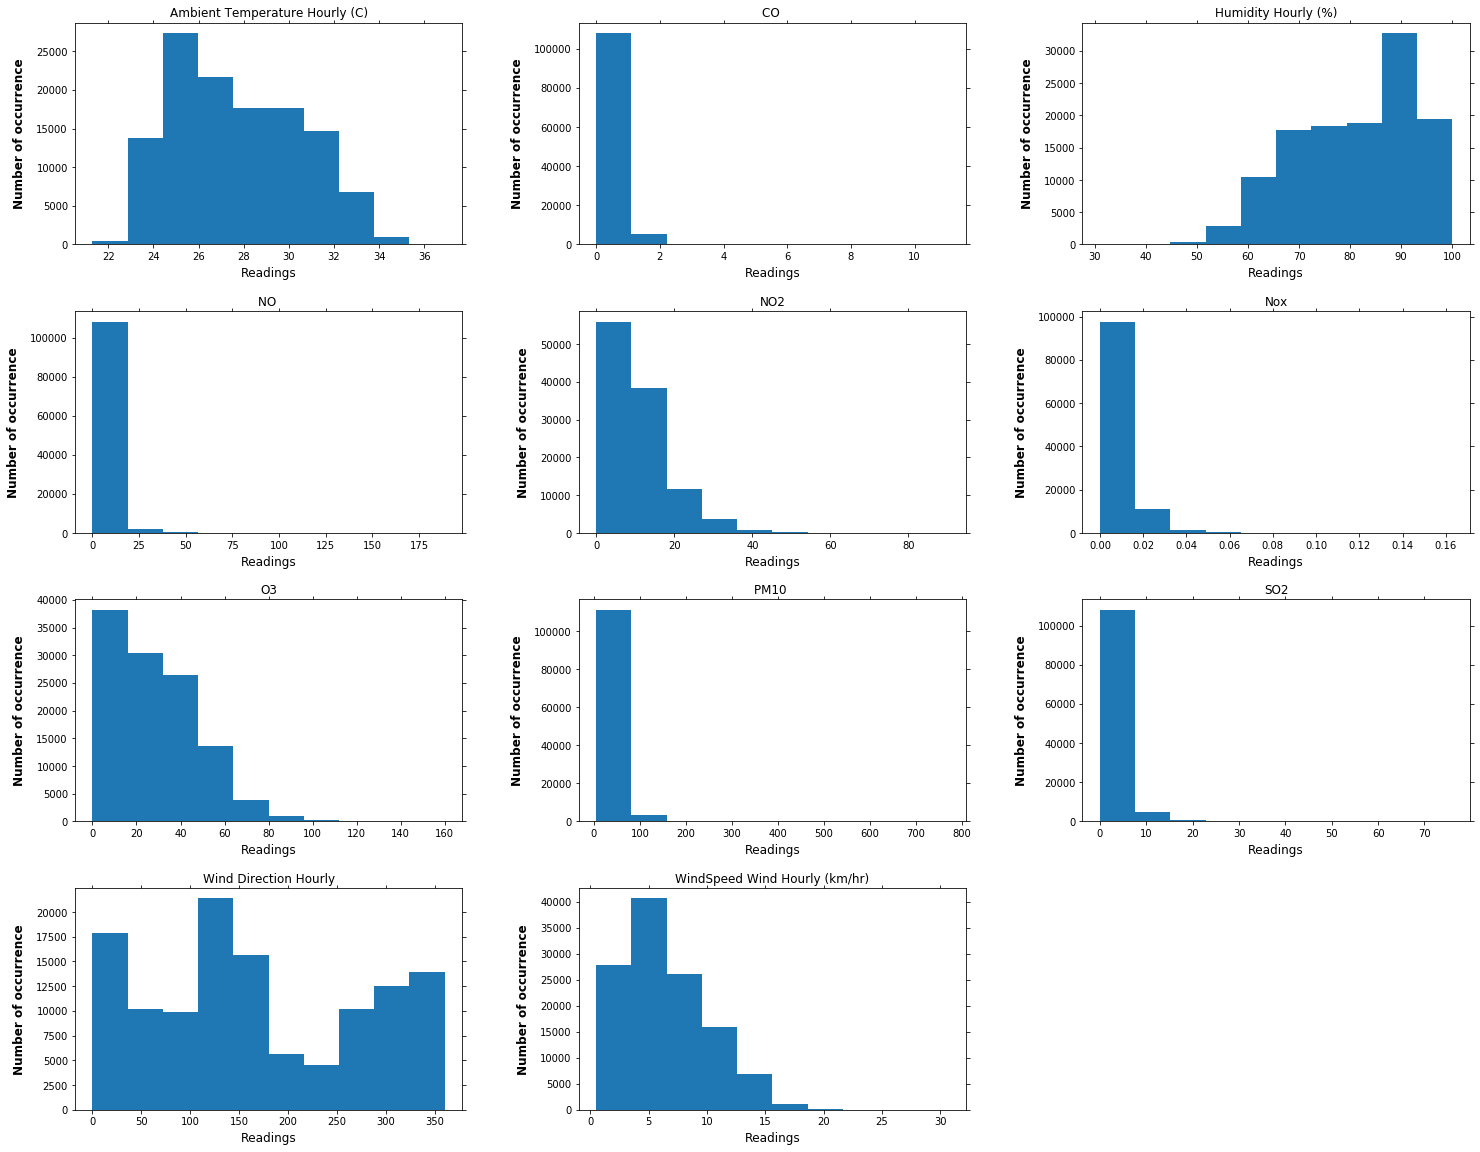

In [22]:

# code to visualize the distribution of the dataset's variable using histo gram
ax = dataset.hist(figsize=(25,20), grid=False)

for y in ax:
    for x in y:
        x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", 
                      left="off", right="off", labelleft="on")
        # Set x-axis label
        x.set_xlabel("Readings", labelpad=5, size=12)
  
        # Set y-axis label
        x.set_ylabel("Number of occurrence", labelpad=10, weight='bold', size=12)

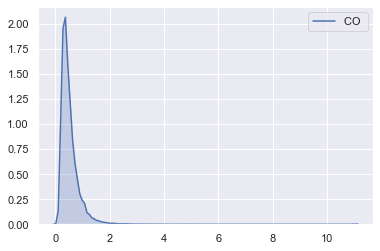

In [15]:


sns.kdeplot(dataset['CO '], shade=True);

In [33]:

def histogramForFrequency(prameter, name):
    
    %matplotlib inline
    plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
     # Plot Histogram on x
    plt.hist(prameter, bins=50)
    plt.gca().set(title='Frequency Histogram for '+name, xlabel= 'Value of '+name ,ylabel='Frequency');

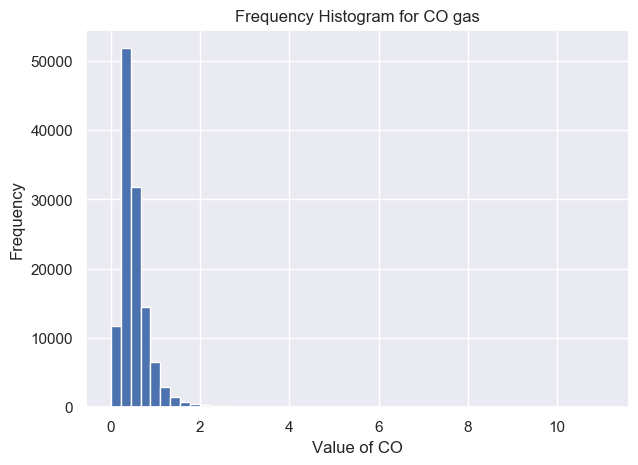

In [24]:
histogramForFrequency(dataset['CO '], 'CO')

In [ ]:
histogramForFrequency(dataset['CO '], 'CO')

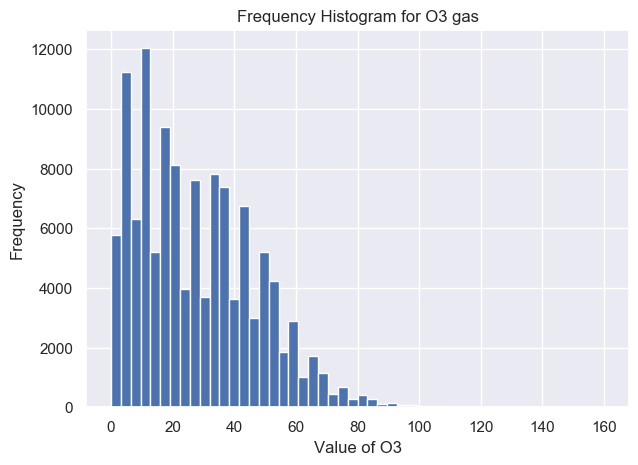

In [28]:
histogramForFrequency(dataset['O3'], 'O3')

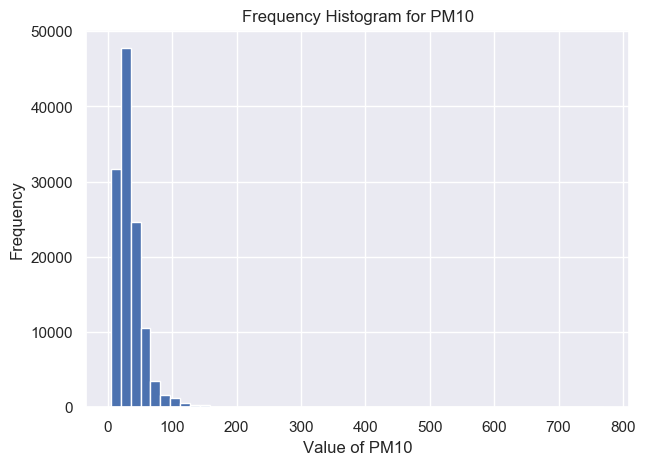

In [36]:
histogramForFrequency(dataset['PM10 '], 'PM10')

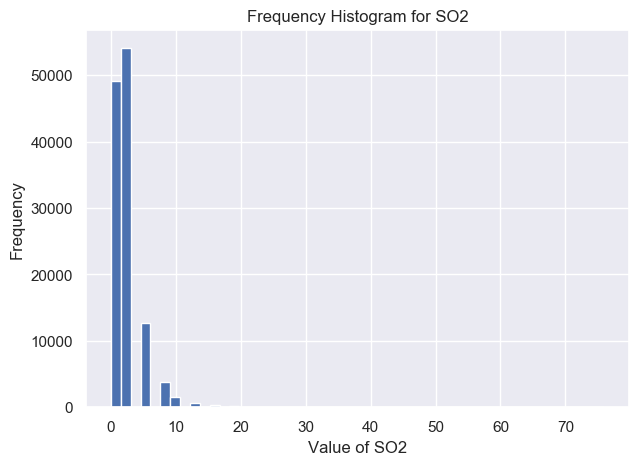

In [35]:
histogramForFrequency(dataset['SO2'], 'SO2')

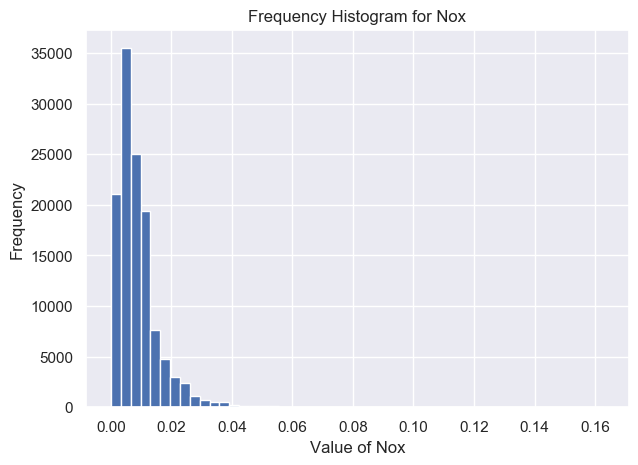

In [37]:
histogramForFrequency(dataset['Nox'], 'Nox')

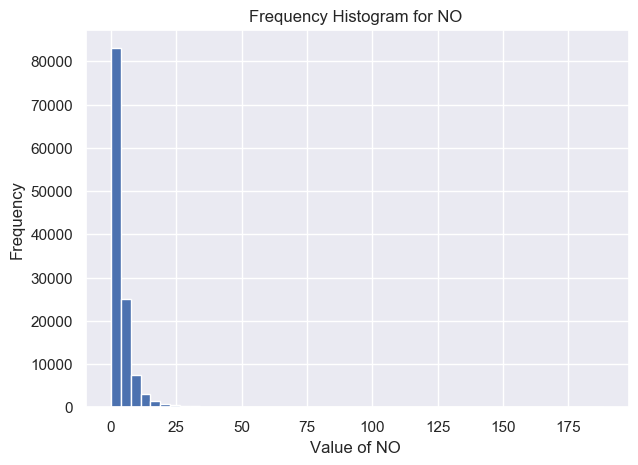

In [41]:
histogramForFrequency(dataset['NO '], 'NO ')

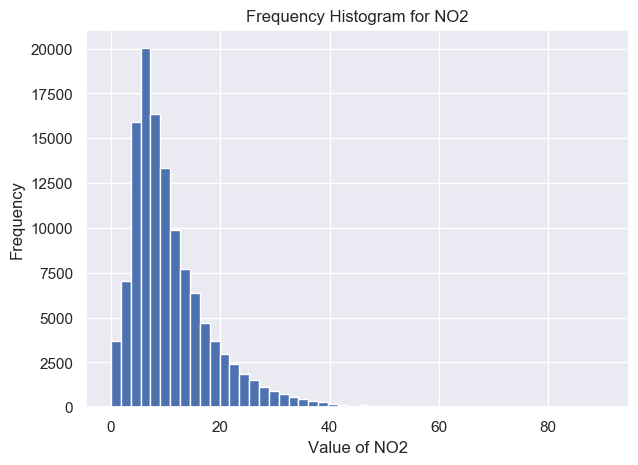

In [42]:
histogramForFrequency(dataset['NO2'], 'NO2')

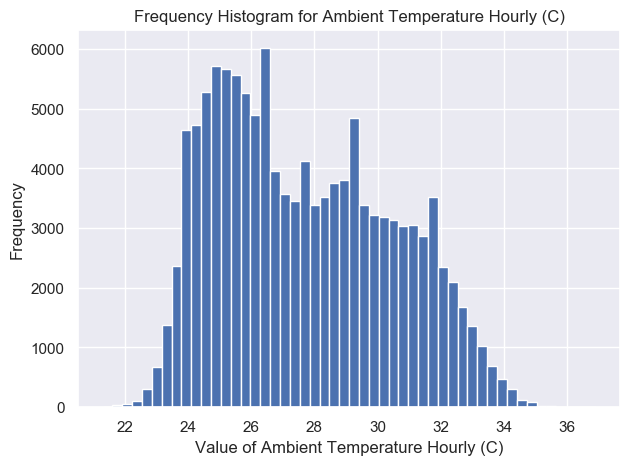

In [43]:
histogramForFrequency(dataset['Ambient Temperature Hourly (C)'], 'Ambient Temperature Hourly (C)')

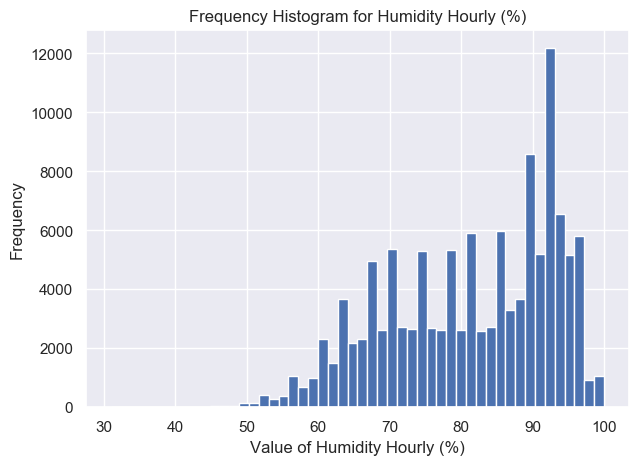

In [45]:
histogramForFrequency(dataset['Humidity Hourly (%)'], 'Humidity Hourly (%)')

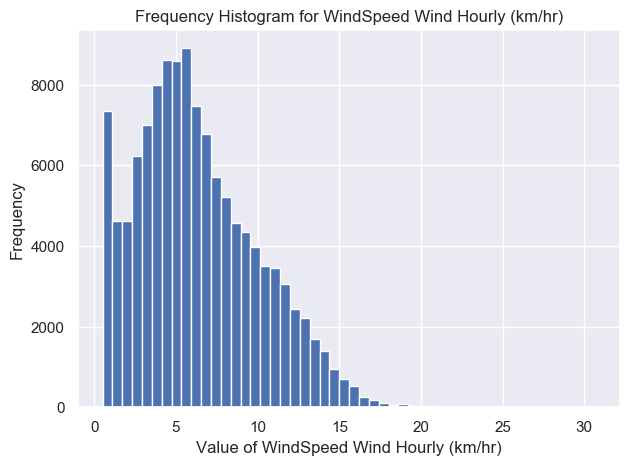

In [46]:
histogramForFrequency(dataset['WindSpeed Wind Hourly (km/hr)'], 'WindSpeed Wind Hourly (km/hr)')

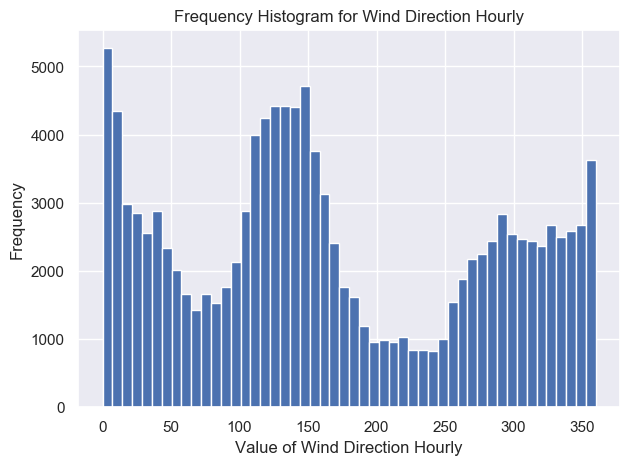

In [47]:
histogramForFrequency(dataset['Wind Direction Hourly'], 'Wind Direction Hourly')

In [66]:
dataset.columns

Index(['CO ', 'O3', 'PM10 ', 'SO2', 'Nox', 'NO ', 'NO2',
       'Ambient Temperature Hourly (C)', 'Humidity Hourly (%)',
       'WindSpeed Wind Hourly (km/hr)', 'Wind Direction Hourly'],
      dtype='object')

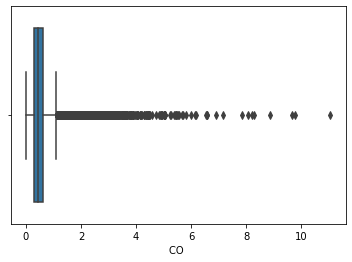

In [14]:
sns.boxplot(x=dataset['CO '])

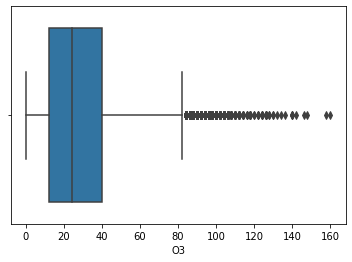

In [15]:
sns.boxplot(x=dataset['O3'])

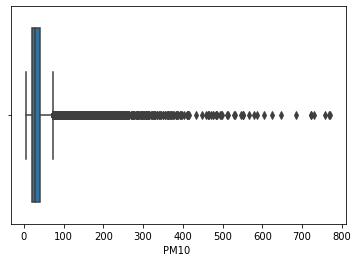

In [18]:
sns.boxplot(x=dataset['PM10 '])

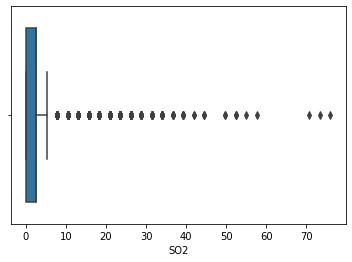

In [20]:
sns.boxplot(x=dataset['SO2'])


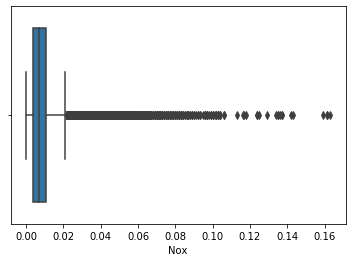

In [25]:
sns.boxplot(x=dataset['Nox'])


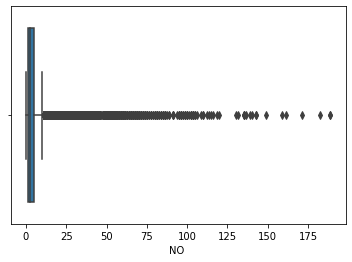

In [26]:
sns.boxplot(x=dataset['NO '])

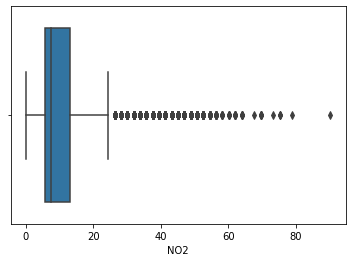

In [29]:
sns.boxplot(x=dataset['NO2'])

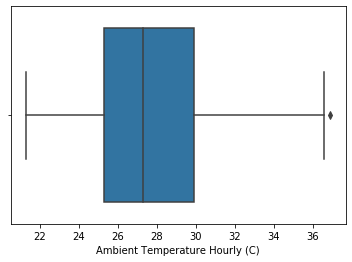

In [30]:
sns.boxplot(x=dataset['Ambient Temperature Hourly (C)'])

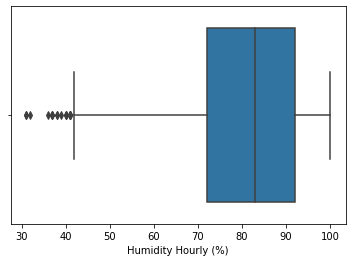

In [31]:
sns.boxplot(x=dataset['Humidity Hourly (%)'])

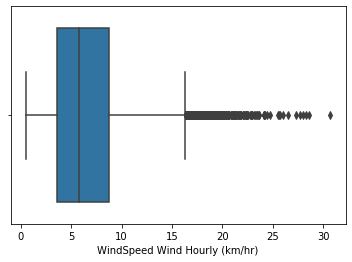

In [32]:
sns.boxplot(x=dataset['WindSpeed Wind Hourly (km/hr)'])

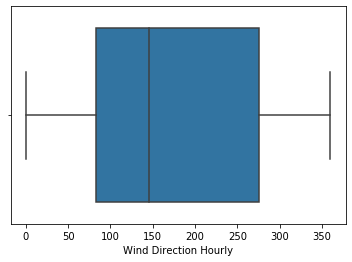

In [33]:
sns.boxplot(x=dataset['Wind Direction Hourly'])

In [10]:
#Correlation Analysis
correlation = dataset.corr()

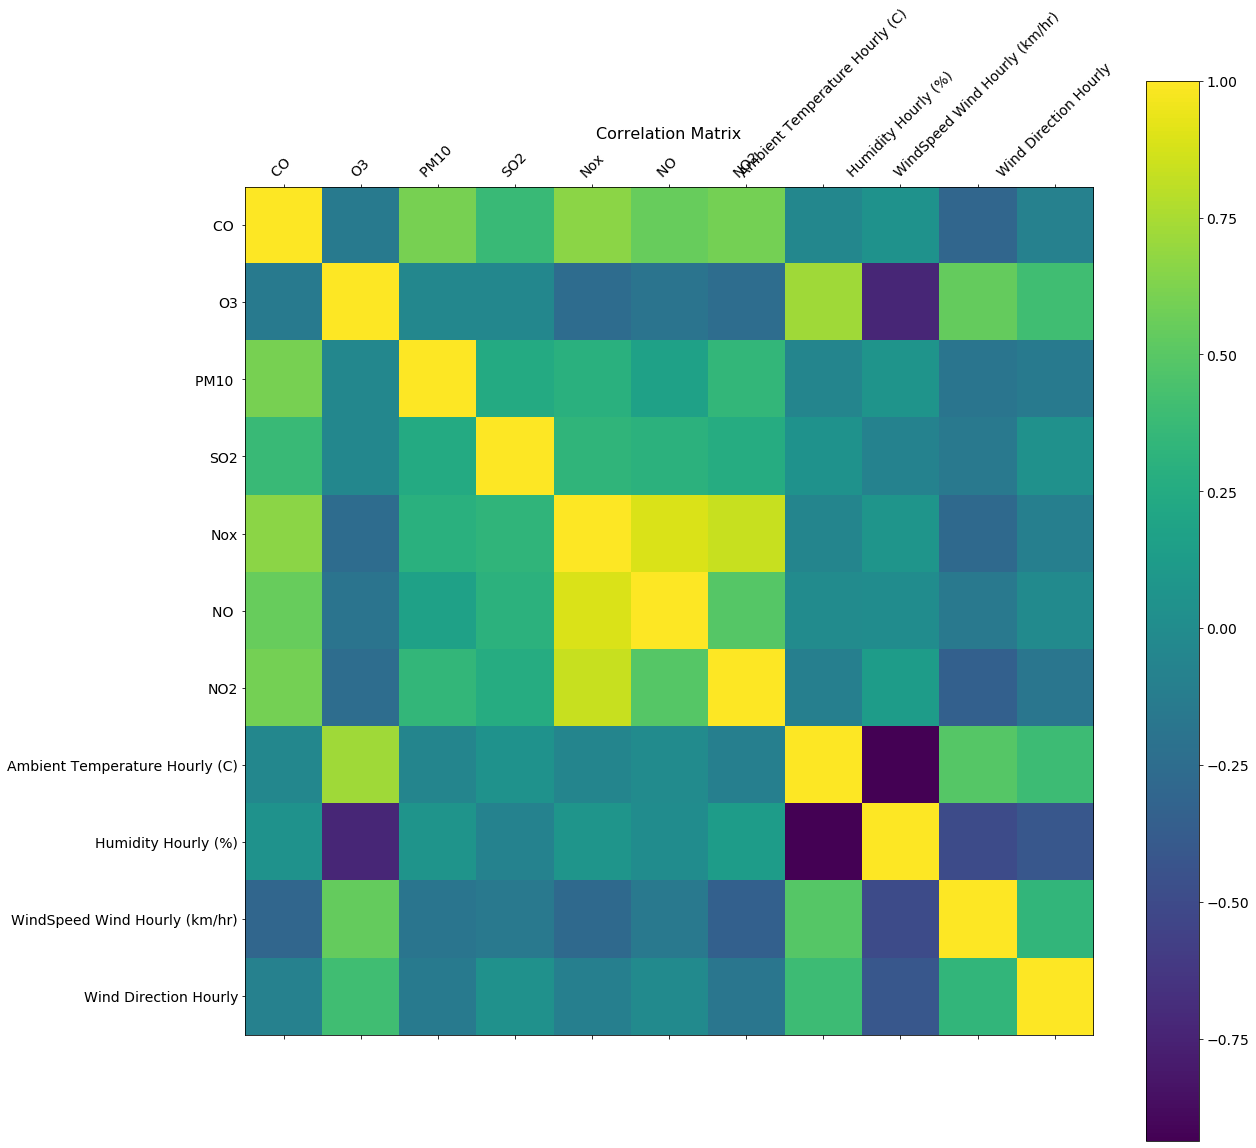

In [23]:
#visualize the correlation analysis
df = dataset
f = plt.figure(figsize=(19, 19))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [22]:

def VisulizeCorrelationAnalysis(corr):
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype = np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize = (20, 15))

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask = mask,
                square = True, linewidths = .8, ax = ax, cmap = "BuPu" , annot=True)      
   
    plt.show()

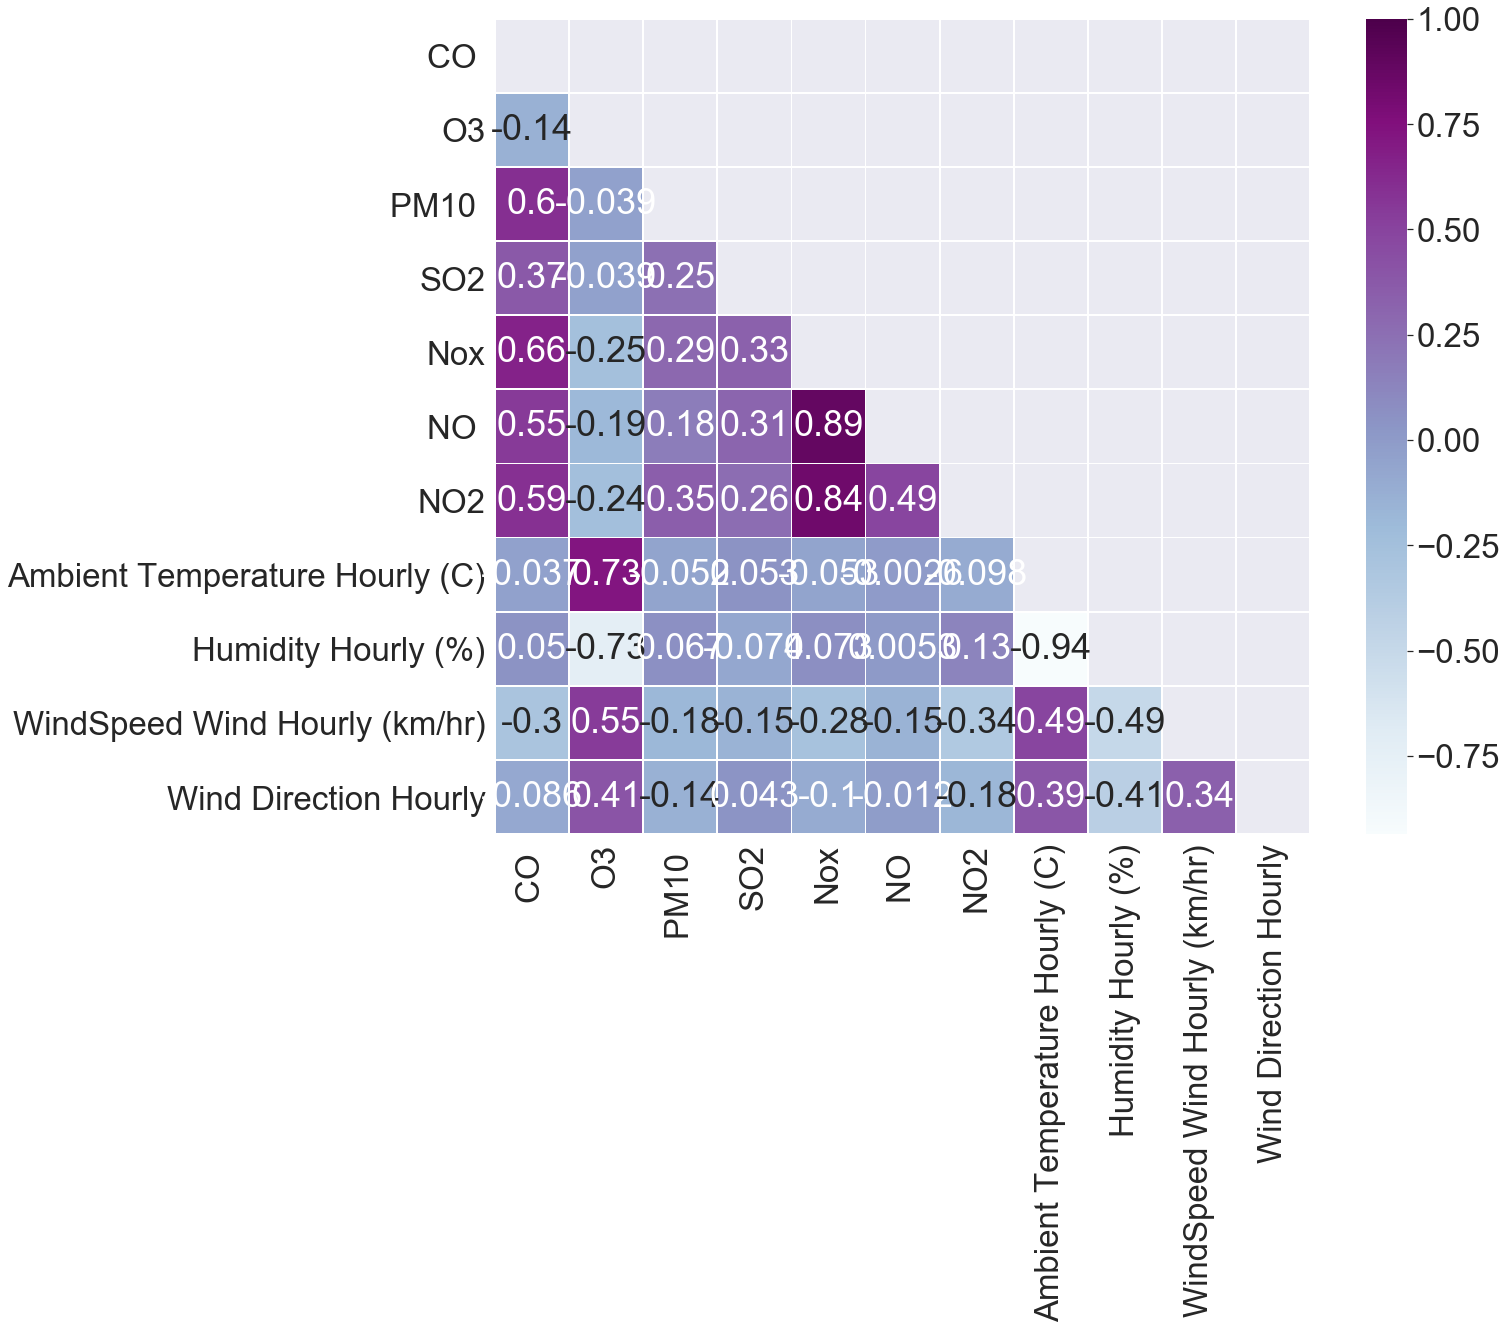

,CO,O3,PM10,SO2,Nox,NO,NO2,Ambient Temperature Hourly (C),Humidity Hourly (%),WindSpeed Wind Hourly (km/hr),Wind Direction Hourly
CO,1.000000,-0.140224,0.602352,0.373192,0.661077,0.553071,0.593602,-0.037499,0.049518,-0.296993,-0.086025
O3,-0.140224,1.000000,-0.039309,-0.038550,-0.248982,-0.191462,-0.243201,0.726316,-0.727182,0.545505,0.405498
PM10,0.602352,-0.039309,1.000000,0.246278,0.294107,0.175233,0.347013,-0.052457,0.066527,-0.182294,-0.136108
SO2,0.373192,-0.038550,0.246278,1.000000,0.330147,0.305792,0.261507,0.052587,-0.074046,-0.151610,0.043133
Nox,0.661077,-0.248982,0.294107,0.330147,1.000000,0.886591,0.837671,-0.053429,0.073034,-0.275510,-0.100177
NO,0.553071,-0.191462,0.175233,0.305792,0.886591,1.000000,0.491372,-0.002613,0.005298,-0.151338,-0.011555
NO2,0.593602,-0.243201,0.347013,0.261507,0.837671,0.491372,1.000000,-0.097896,0.131739,-0.340163,-0.175841
Ambient Temperature Hourly (C),-0.037499,0.726316,-0.052457,0.052587,-0.053429,-0.002613,-0.097896,1.000000,-0.935837,0.493344,0.394047
Humidity Hourly (%),0.049518,-0.727182,0.066527,-0.074046,0.073034,0.005298,0.131739,-0.935837,1.000000,-0.494415,-0.409705
WindSpeed Wind Hourly (km/hr),-0.296993,0.545505,-0.182294,-0.151610,-0.275510,-0.151338,-0.340163,0.493344,-0.494415,1.000000,0.341216


In [23]:
VisulizeCorrelationAnalysis(correlation)
correlation

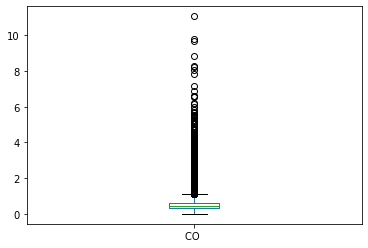

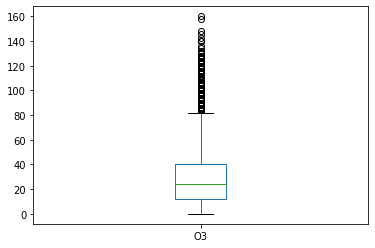

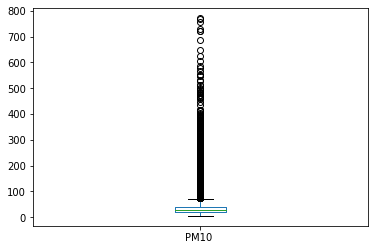

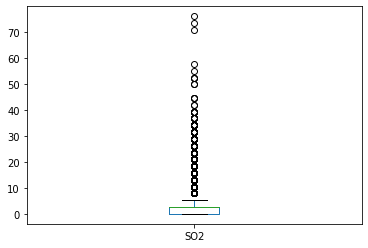

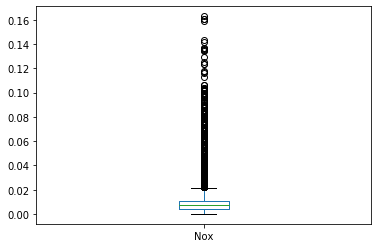

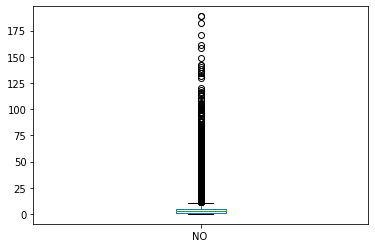

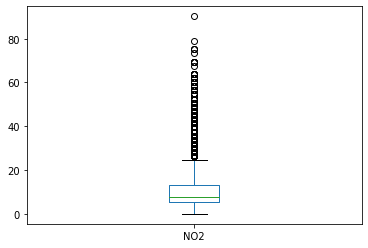

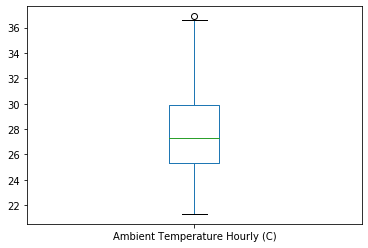

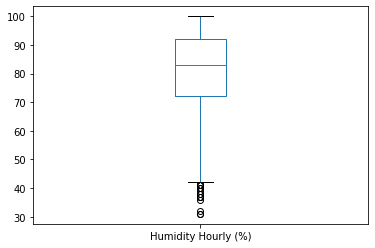

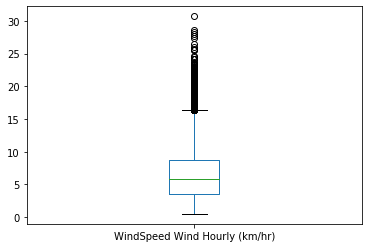

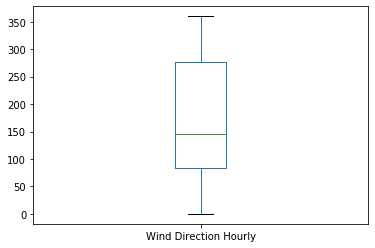

In [24]:
# Generate a Boxplot for CO Hourly (mg/m3)
dataset.iloc[:,[0]].plot(kind='box')
plt.show()
# Generate a Boxplot for O3 Hourly (mg/m3)
dataset.iloc[:,[1]].plot(kind='box')
plt.show()
# Generate a Boxplot for PM10 Hourly (mg/m3)
dataset.iloc[:,[2]].plot(kind='box')
plt.show()
# Generate a Boxplot for SO2 Hourly (mg/m3)
dataset.iloc[:,[3]].plot(kind='box')
plt.show()
# Generate a Boxplot for NOx Hourly (mg/m3)
dataset.iloc[:,[4]].plot(kind='box')
plt.show()
# Generate a Boxplot for NO Hourly (mg/m3)
dataset.iloc[:,[5]].plot(kind='box')
plt.show()
# Generate a Boxplot for NO2 Hourly (mg/m3)
dataset.iloc[:,[6]].plot(kind='box')
plt.show()
# Generate a Boxplot for Temperature Hourly (mg/m3)
dataset.iloc[:,[7]].plot(kind='box')
plt.show()
# Generate a Boxplot for Humidity Hourly (mg/m3)
dataset.iloc[:,[8]].plot(kind='box')
plt.show()
# Generate a Boxplot for WindSpeed Hourly (mg/m3)
dataset.iloc[:,[9]].plot(kind='box')
plt.show()
# Generate a Boxplot for WindDirection Hourly (mg/m3)
dataset.iloc[:,[10]].plot(kind='box')
plt.show()

In [25]:
print("PM10 max value :" + str(dataset.iloc[:,[2]].max()))
print("PM10 min value :"+ str( dataset.iloc[:,[2]].min()))
print("count of pm10 reading less than 50 :"+str( dataset.iloc[:,[2]][dataset.iloc[:,[2]] < 50].count()) )
print("count of pm10 reading greated than 50 :"+str( dataset.iloc[:,[2]][dataset.iloc[:,[2]] > 50].count()) )
print("count of pm10 reading greated than 100 :"+ str(dataset.iloc[:,[2]][dataset.iloc[:,[2]] > 100].count()))
print("count of pm10 reading greated than 200 :"+ str(dataset.iloc[:,[2]][dataset.iloc[:,[2]] > 200].count()))


PM10 max value :PM10     771.0
dtype: float64
PM10 min value :PM10     5.0
dtype: float64
count of pm10 reading less than 50 :PM10     103226
dtype: int64
count of pm10 reading greated than 50 :PM10     18534
dtype: int64
count of pm10 reading greated than 100 :PM10     2526
dtype: int64
count of pm10 reading greated than 200 :PM10     307
dtype: int64


In [30]:
# Normalize the data attributes for the dataset.
from sklearn import preprocessing
normalized =pd.DataFrame(preprocessing.normalize(dataset))
normalized

,0,1,2,3,4,5,6,7,8,9,10
0,0.004524,0.032928,0.296353,0.000000,0.000077,0.034300,0.092857,0.143786,0.488434,0.004939,0.801252
1,0.003216,0.028566,0.228526,0.024947,0.000067,0.023805,0.089506,0.124737,0.423725,0.008094,0.861732
2,0.004612,0.017324,0.194893,0.022694,0.000104,0.054137,0.113991,0.112172,0.389787,0.011694,0.883517
3,0.003833,0.030903,0.206020,0.026989,0.000088,0.038629,0.106512,0.131338,0.478997,0.011846,0.834382
4,0.002078,0.061960,0.137198,0.011595,0.000040,0.011064,0.058243,0.111971,0.411594,0.019916,0.889573
...,...,...,...,...,...,...,...,...,...,...,...
122731,0.004853,0.310134,0.113716,0.027085,0.000103,0.025844,0.155480,0.286370,0.841211,0.094074,0.258445
122732,0.004705,0.340777,0.110251,0.026260,0.000080,0.012529,0.131901,0.277645,0.815583,0.091208,0.320731
122733,0.003666,0.291084,0.077622,0.025421,0.000078,0.012129,0.127689,0.268780,0.789540,0.076652,0.436626
122734,0.003761,0.225238,0.093849,0.024588,0.000084,0.011731,0.141149,0.259974,0.763672,0.050679,0.516170


In [31]:
# split data to dependent and independent variables 
X = normalized.iloc[:, [0,1,3,4,5,6,7,8,9,10]].values
y = normalized.iloc[:,[2]].values

In [32]:
# Divide the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 99)

In [33]:
# Random Forest Regression using 200 trees with out of bag = true
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 200, random_state = 0, oob_score=True)
regressor.fit(X_train, y_train)
y_predRandomForest = regressor.predict(X_test)
from sklearn import metrics
print( metrics.r2_score(y_test,y_predRandomForest))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.9780433339643235


In [37]:
print("the accuracy of the model = " + str(metrics.r2_score(y_test,y_predRandomForest)))

the accuracy of the model = 0.9780433339643235


# Start the time series analysis

In [67]:
data_date.drop(data_date.columns[[0]], axis = 1, inplace = True)
data_date.columns

Index(['DateTime', 'CO ', 'O3', 'PM10 ', 'SO2', 'Nox', 'NO ', 'NO2',
       'Ambient Temperature Hourly (C)', 'Humidity Hourly (%)',
       'WindSpeed Wind Hourly (km/hr)', 'Wind Direction Hourly'],
      dtype='object')

In [38]:
import datetime
from fbprophet import Prophet

# CO Prophet time series

In [79]:
data = [data_date["DateTime"],data_date["CO "] ]
Df_Date_Co = pd.concat(data, axis=1)

In [83]:
Df_Date_Co.columns=['ds','y']
Df_Date_Co.head()

,ds,y
0,1/1/2000 0:00,0.82440
1,1/1/2000 1:00,0.67555
2,1/1/2000 2:00,1.06485
3,1/1/2000 3:00,0.74425
4,1/1/2000 4:00,0.46945


In [84]:
m = Prophet()
m.fit(Df_Date_Co)

In [105]:
future = m.make_future_dataframe(periods=0)

In [106]:
future.tail(5)

,ds
122731,2013-12-31 19:00:00
122732,2013-12-31 20:00:00
122733,2013-12-31 21:00:00
122734,2013-12-31 22:00:00
122735,2013-12-31 23:00:00


In [107]:
forecast = m.predict(future)

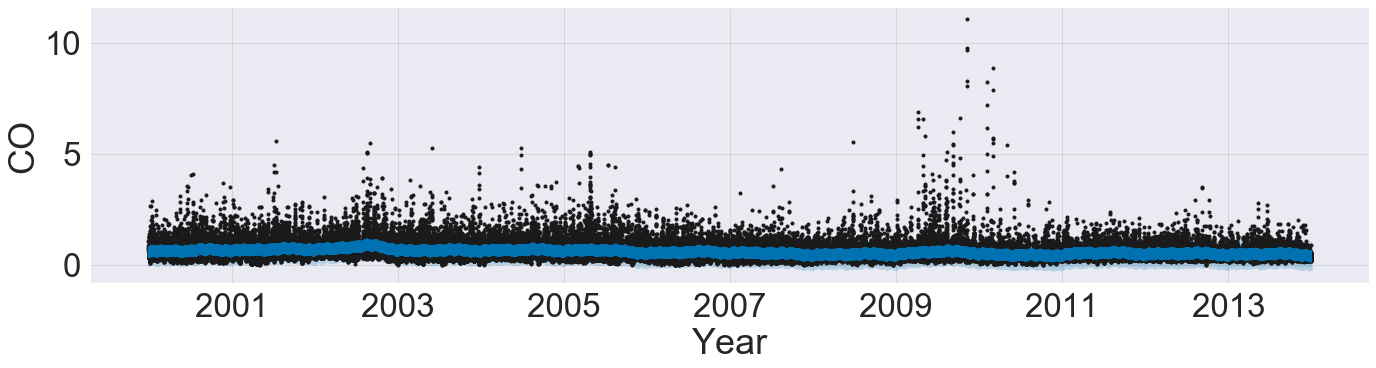

In [108]:

fig1 = m.plot(forecast,  figsize=(20, 6), xlabel='Year' , ylabel='CO' )


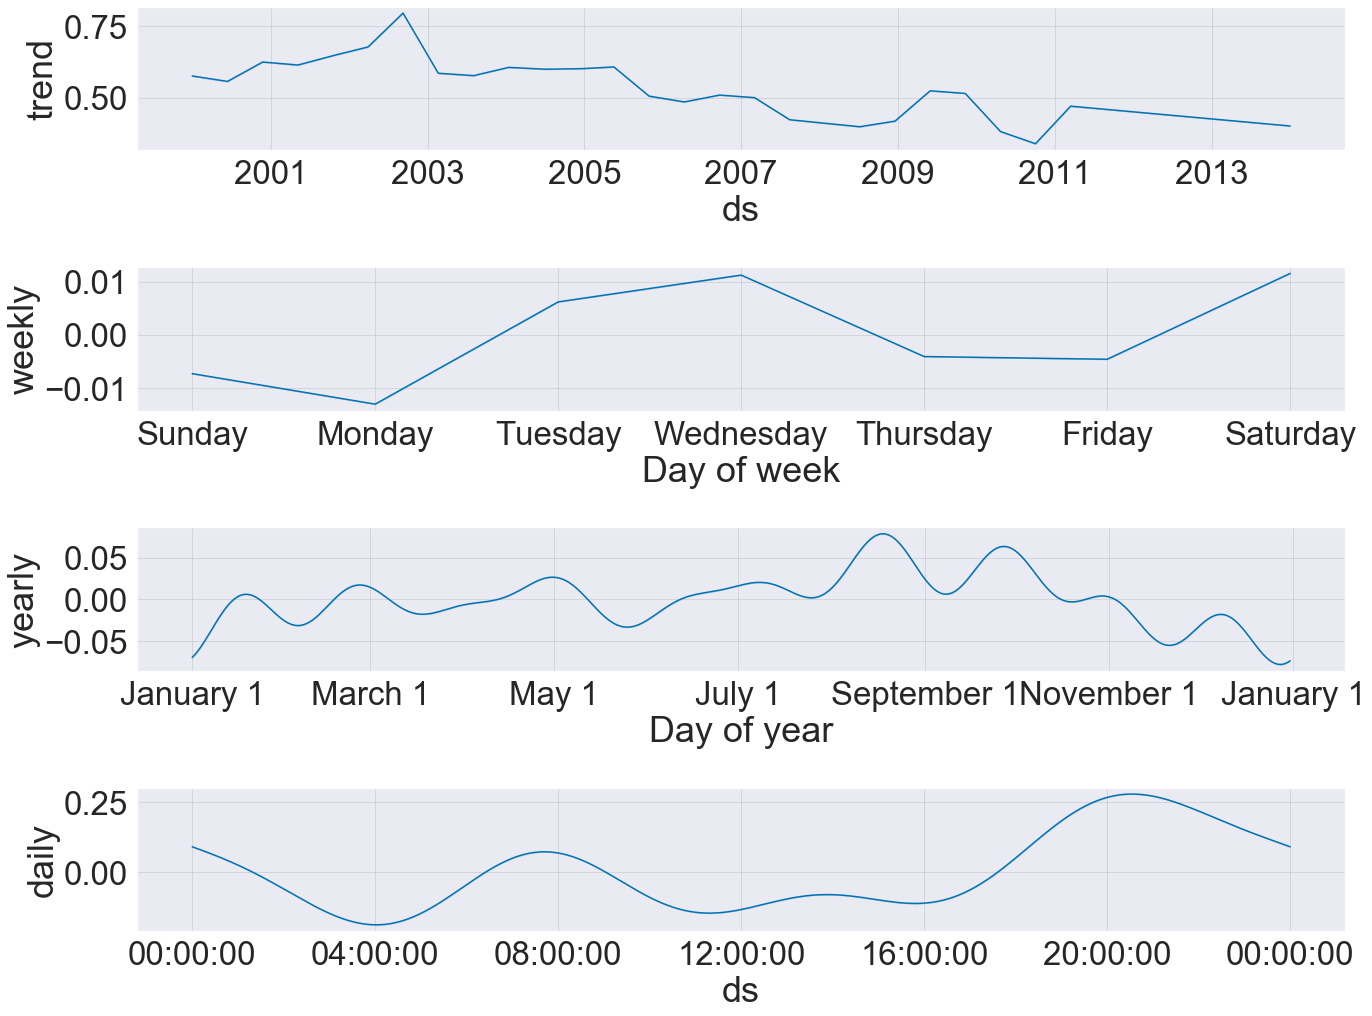

In [109]:
fig2 = m.plot_components(forecast, figsize=(20, 15))

# O3Prophet time series

In [114]:
data_O3= [data_date["DateTime"],data_date["O3"] ]
Df_Date_O3 = pd.concat(data_O3, axis=1)
Df_Date_O3.columns=['ds','y']
Df_Date_O3.head()
                    

,ds,y
0,1/1/2000 0:00,6.0
1,1/1/2000 1:00,6.0
2,1/1/2000 2:00,4.0
3,1/1/2000 3:00,6.0
4,1/1/2000 4:00,14.0


In [116]:
m_O3 = Prophet()
m_O3.fit(Df_Date_O3)

In [122]:
futureO3 = m_O3.make_future_dataframe(periods=0)
futureO3.tail(5)

,ds
122731,2013-12-31 19:00:00
122732,2013-12-31 20:00:00
122733,2013-12-31 21:00:00
122734,2013-12-31 22:00:00
122735,2013-12-31 23:00:00


In [124]:
forecast_O3 = m_O3.predict(futureO3)

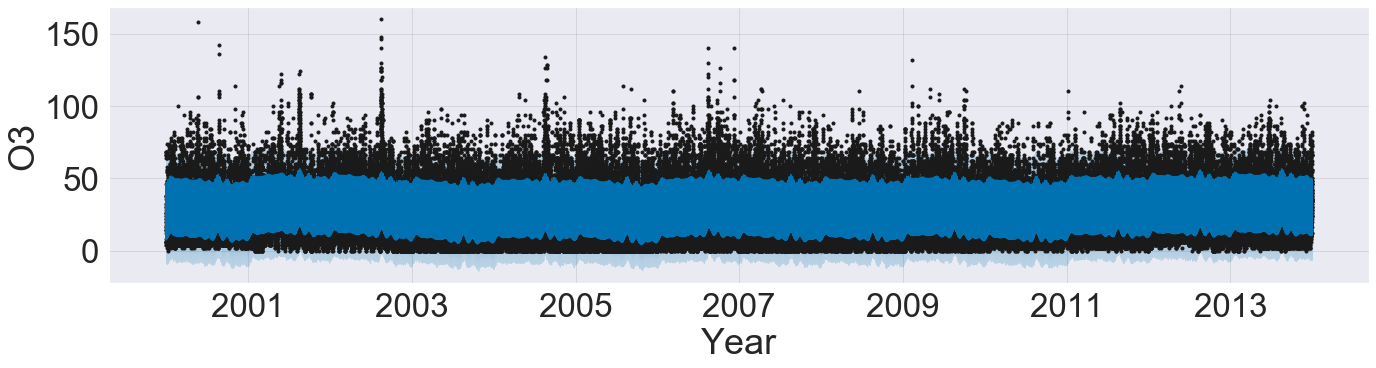

In [126]:
fig1 = m_O3.plot(forecast_O3,  figsize=(20, 6), xlabel='Year' , ylabel='O3' )

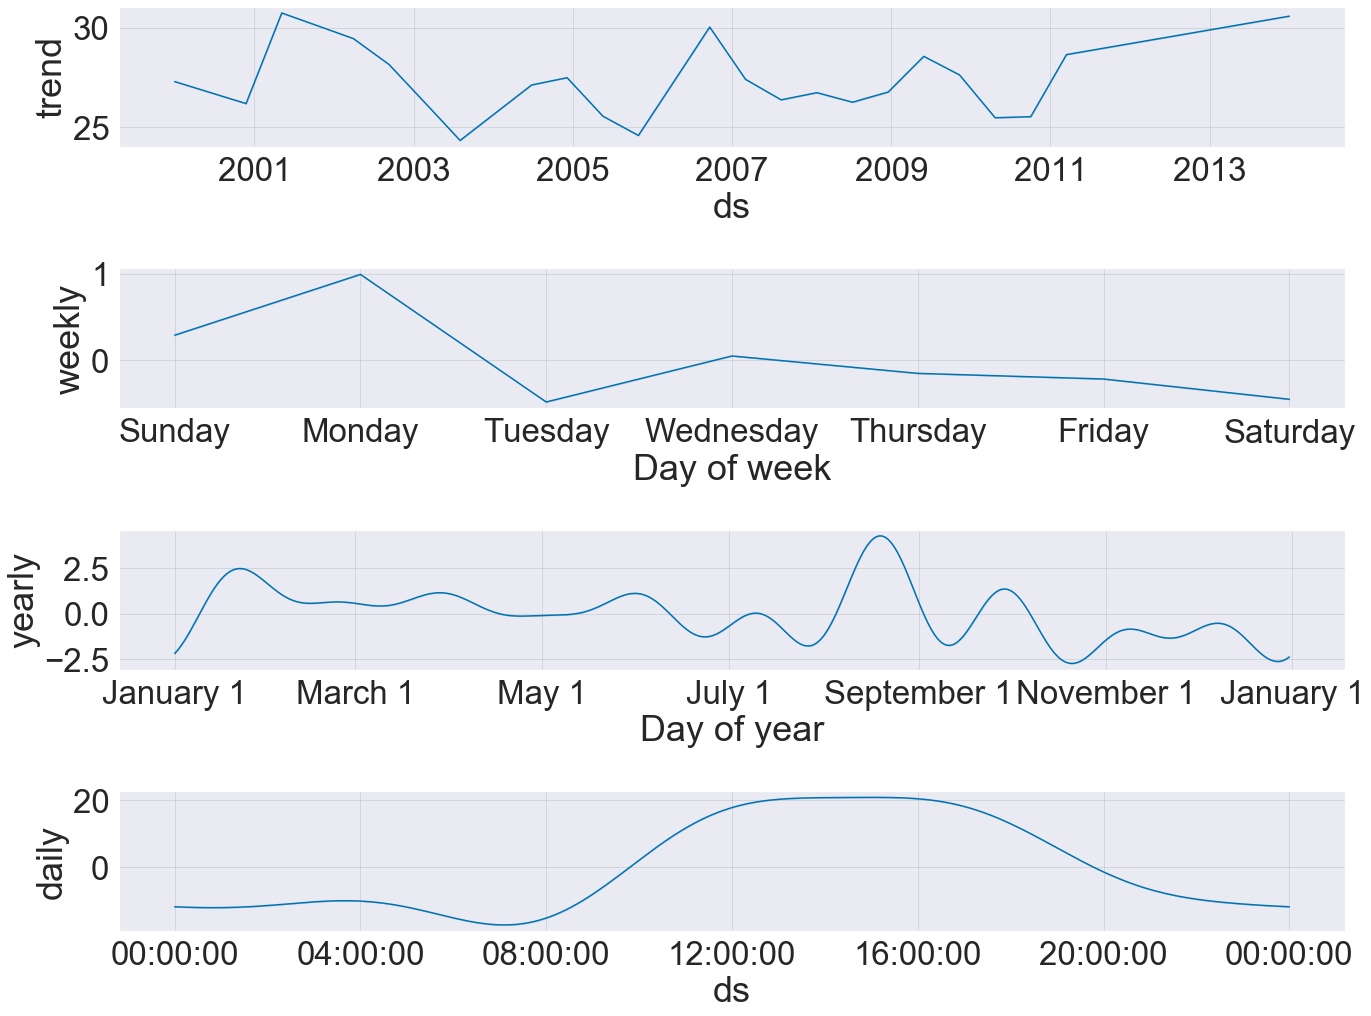

In [130]:
fig1 = m_O3.plot_components(forecast_O3,  figsize=(20, 15)  )

# PM10 Prophet time series


In [16]:
data_Pm10= [data_date["DateTime"],data_date["PM10 "] ]
Df_Date_PM10 = pd.concat(data_Pm10, axis=1)
Df_Date_PM10.columns=['ds','y']
Df_Date_PM10.head()

,ds,y
0,1/1/2000 0:00,54.0
1,1/1/2000 1:00,48.0
2,1/1/2000 2:00,45.0
3,1/1/2000 3:00,40.0
4,1/1/2000 4:00,31.0


In [17]:
m_Pm10 = Prophet()
m_Pm10.fit(Df_Date_PM10)

In [20]:
futurePm10 = m_Pm10.make_future_dataframe(periods=0)
futurePm10.tail(5)

,ds
122731,2013-12-31 19:00:00
122732,2013-12-31 20:00:00
122733,2013-12-31 21:00:00
122734,2013-12-31 22:00:00
122735,2013-12-31 23:00:00


In [ ]:
forecastPm10 = m_Pm10.predict(futurePm10)

In [ ]:
figPm10 = m_Pm10.plot(forecastPm10,  figsize=(20, 6), xlabel='Year' , ylabel='Pm10' )

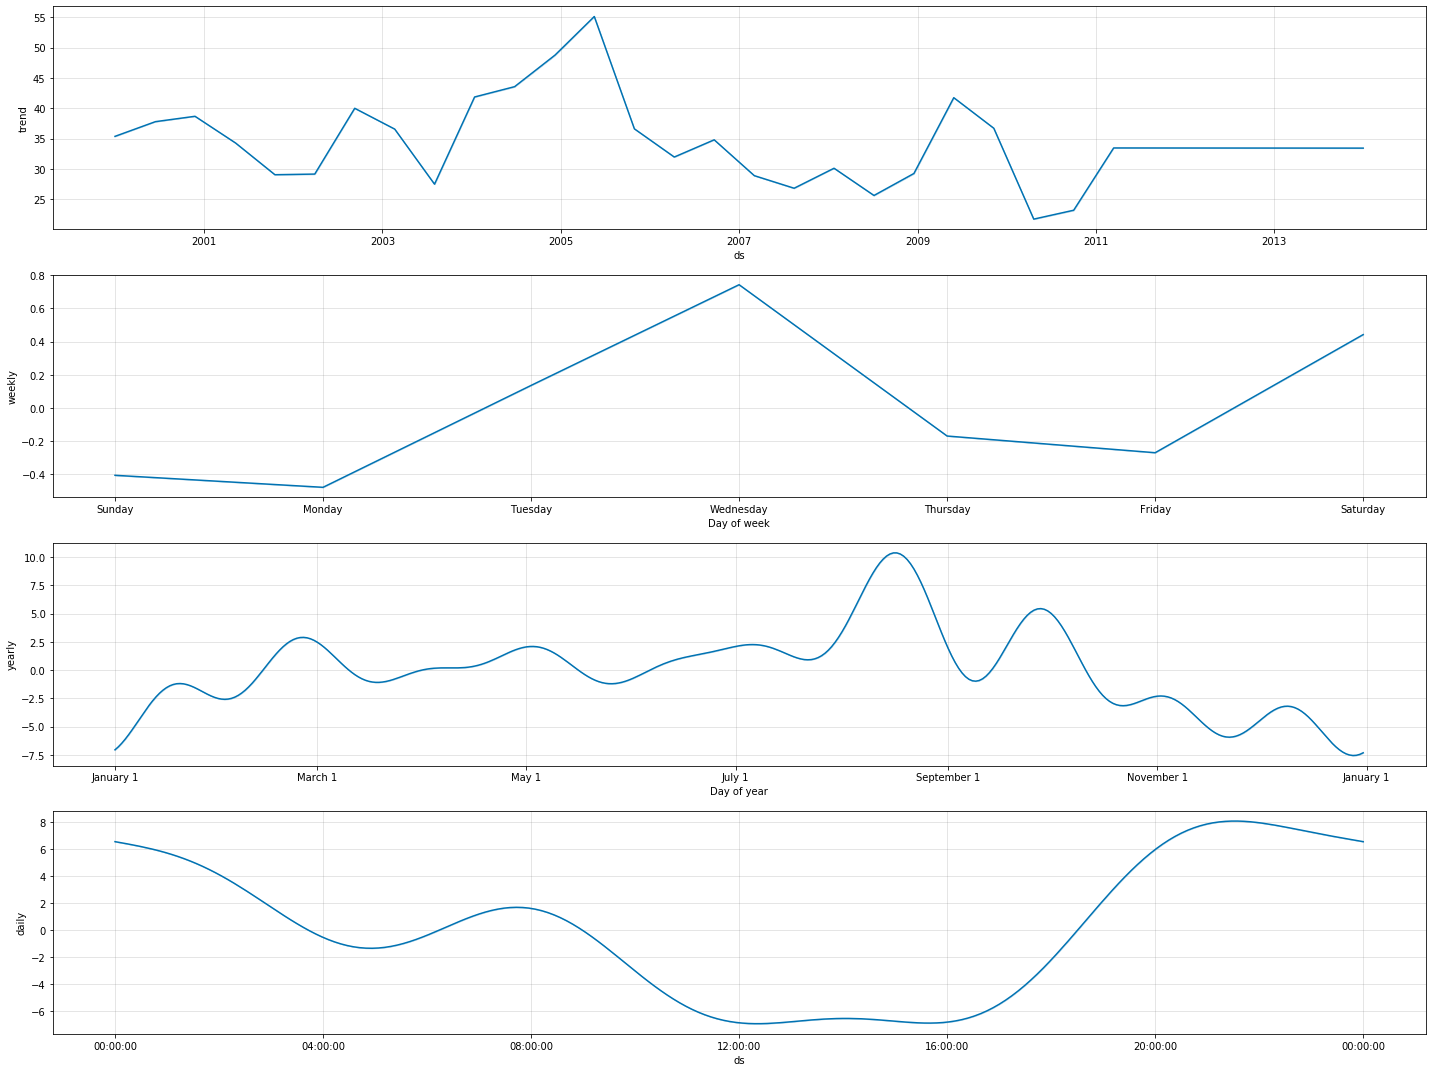

In [35]:
fig1Pm10= m_Pm10.plot_components(forecastPm10,  figsize=(20, 15)  )

# SO2 Prophet time series

In [ ]:
'DateTime', 'CO ', 'O3', 'PM10 ', 'SO2', 'Nox', 'NO ', 'NO2',
       'Ambient Temperature Hourly (C)', 'Humidity Hourly (%)',
       'WindSpeed Wind Hourly (km/hr)', 'Wind Direction Hourly'],

In [27]:
data_SO2= [data_date["DateTime"],data_date["SO2"] ]
Df_Date_SO2 = pd.concat(data_SO2, axis=1)
Df_Date_SO2.columns=['ds','y']
Df_Date_SO2.head()

,ds,y
0,1/1/2000 0:00,0.00
1,1/1/2000 1:00,5.24
2,1/1/2000 2:00,5.24
3,1/1/2000 3:00,5.24
4,1/1/2000 4:00,2.62


In [37]:
m_SO2 = Prophet()
m_SO2.fit(Df_Date_SO2)

In [18]:
futureSO2 = m_SO2.make_future_dataframe(periods=0)
futureSO2.tail(5)

,ds
122731,2013-12-31 19:00:00
122732,2013-12-31 20:00:00
122733,2013-12-31 21:00:00
122734,2013-12-31 22:00:00
122735,2013-12-31 23:00:00


In [22]:
forecastSO2 = m_SO2.predict(futureSO2)

KeyError: 'yhat'

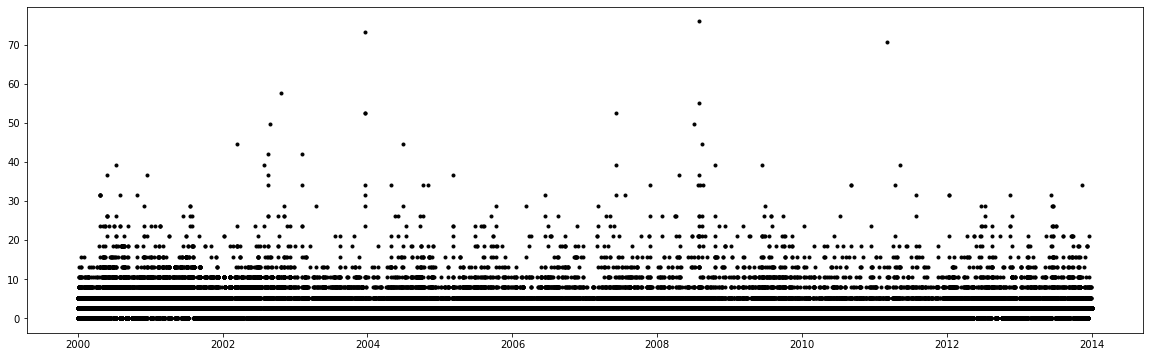

In [40]:
figSO2 = m_SO2.plot(futureSO2,  figsize=(20, 6), xlabel='Year' , ylabel='SO2' )

KeyError: 'trend'

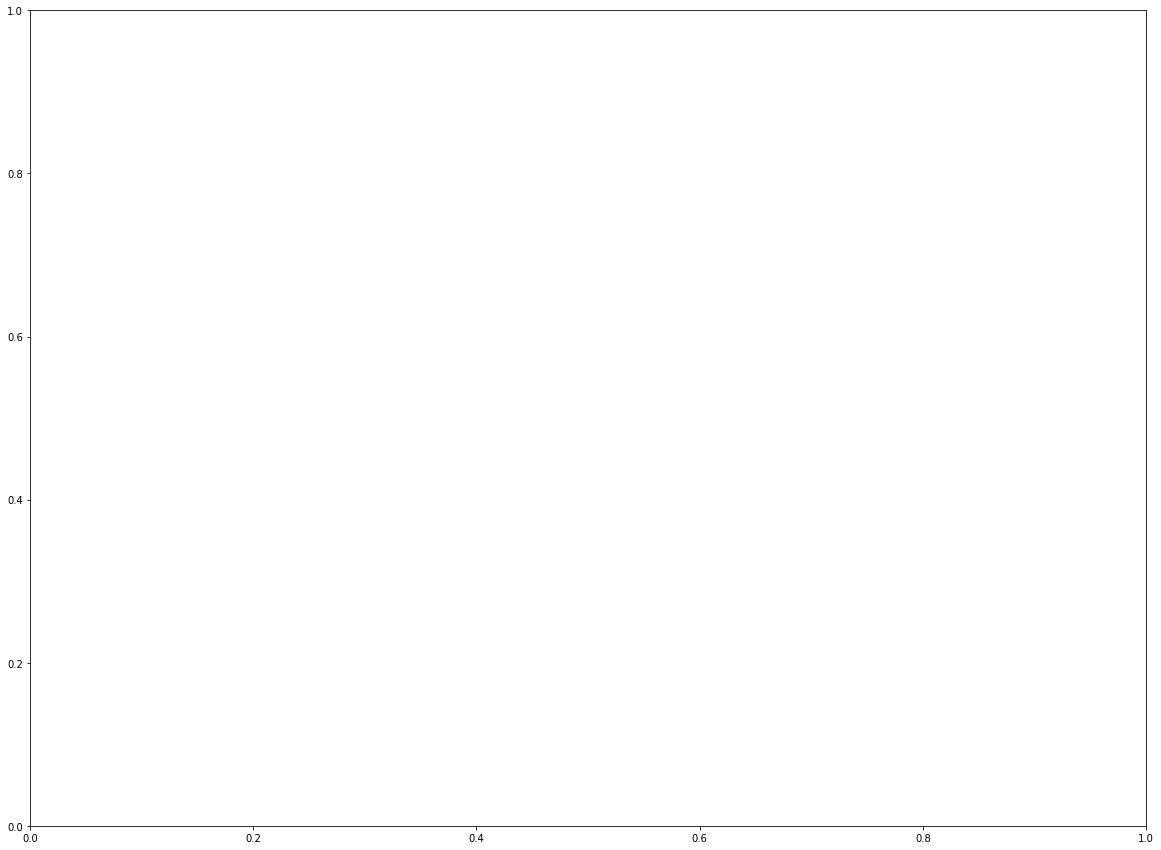

In [39]:
fig1SO2= m_SO2.plot_components(futureSO2,  figsize=(20, 15)  )